In [ ]:
# This program produces a color map with contours to show 
# the relative energy of different orientations for the benzene-naphthalene S1 exciplex. 

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import scipy.ndimage
import matplotlib.lines as mlines
import numpy as np
import matplotlib.cm as cm
import matplotlib.ticker as plticker

In [9]:
plt.rcParams.update({'font.size': 13})
# file with energies for each x,y,z displacement (at minimum-energy rotation)
fname = 'angle5energies.dat'
zVal = 3.1 # we will hold z displacement constant at this value 
nX = 8 # number of displacements in x and y directions 
nY = 13
enVals = np.zeros((nX, nY))

In [12]:
with open(fname) as f:
        fLines = f.readlines()
        xVals = list()
        yVals = list()
# read file line by line, store energies in array based on index of x + y displacement 
        for i, line in enumerate(fLines):
                tokens = line.split()
                if(float(tokens[2]) == zVal):
                        x = float(tokens[0])
                        y = float(tokens[1])
                        if x not in xVals: 
                            xVals.append(x)
                        if y not in yVals: 
                            yVals.append(y)
                        energy = float(tokens[4])
                        enVals[xVals.index(x), yVals.index(y)] = energy 

In [13]:
# set minimum energy = 0 
xVals = np.array(xVals)
yVals = np.array(yVals)
yVals -= yVals.min()
enVals -= enVals.min()

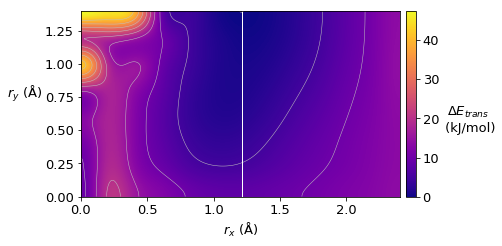

In [22]:
# color map (plasma color function is perceptually uniform)
im = plt.imshow(enVals, extent = ( yVals.min(), yVals.max(), xVals.min(), xVals.max()), interpolation='bicubic', cmap=cm.plasma)
# color bar for scale 
CBI=plt.colorbar(im, orientation='vertical',  pad=0.02, fraction=0.0278)
CBI.set_label('$\Delta E_{trans}$ \n (kJ/mol)', rotation='horizontal', labelpad=29)
# add contours 
levels = np.arange(0,45,5)
enVals = scipy.ndimage.zoom(enVals,4)
CS = plt.contour(enVals, levels, colors = 'silver', origin='upper', linewidths=0.5, extent=( yVals.min(), yVals.max(), xVals.min(), xVals.max()))
ax = plt.gca()
ymin, ymax = ax.get_ybound()
# add a line at the minimum-energy y value 
ax.add_line(mlines.Line2D([1.21,1.21],[ymin,ymax], color='white', lw=1))
# axis labels 
plt.ylabel('$r_{y}$ ($\mathrm{\AA}$)', labelpad=20, rotation='horizontal', fontsize=13)
plt.xlabel('$r_{x}$ ($\mathrm{\AA}$)', fontsize=13)

In [23]:
plt.savefig('zIsoBenzNaphPoster.pdf', format='pdf', bbox_inches='tight')